In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pp
from  sklearn import preprocessing
%matplotlib inline

In [2]:
from  sklearn import preprocessing
%matplotlib inline

In [3]:
crop_name='banana'
state='mp'
region='bhopal'
#loading data
data=pd.read_excel('data/'+state+'/'+region+'_data.xls')# eg. mp/bhopal_data.xls


In [4]:
#prediction will be done according to different crops as one will not 
#depend on other and hence distort the graph for others.
#filter data according to crop_name
data=data.loc[data['Crop']==crop_name]
#now sorted so that we could only take last 10 years to predict next
data=data.sort_values(by='year',ascending=True).drop('Crop',axis=1).drop('Production Quantity - tonnes',axis=1).drop('year',axis=1)
#data.tail()

In [5]:


# as fit() method can't use 'string' and out "Crop" column has string so we have to transform into intergers
# method 1 - find number of classes and assign unique id manually
# method 2 - let python do that for us ,using 'labelEncoder' class


#NOT NEEDED as we have filtered above according to crop and removed 'Crop' column

# #creating labelEncoder
# encoder=preprocessing.LabelEncoder()#creating object
# encoder.fit(data['Crop'])#fitting 'string labels' with encode as integers
# #transform - convert string to number, inverse_transform -convert number to string
# X['crop']=encoder.transform(data['Crop'])
# #encoder.inverse_transform(0)
# #removing the X['Crop'] column
# X.drop(inplace=True,axis=1,labels='Crop')


In [6]:
#making model
model=LinearRegression()
#data.head()

In [7]:
#deviding into features and labels
X,y=data.iloc[:,0:-1],data.iloc[:,-1:]
# X# all columns other than last(features)
# y#only last column, Yeild(label)

In [8]:
#devided data into training and testing but now not needed
# Xdas=X.iloc[-10:-5]
# ydas=y.iloc[-10:-5]#last 10
# ydas

In [9]:
#training model from full data
model.fit(X,y)

LinearRegression()

In [17]:
model.score(X[-10:],y[-10:])

0.02029815430197801

ValueError: operands could not be broadcast together with shapes (2,) (46,) 

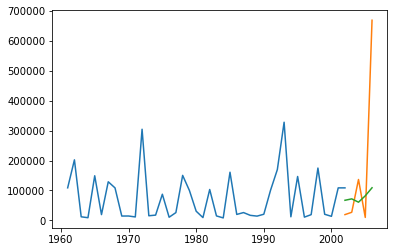

In [19]:
#plotting here for just showing, not needed in real program
pp.plot(range(1961,2003),y.iloc[:-5]) # training
pp.plot(range(2002,2007),y.iloc[-5:]) # test
pp.plot(range(2002,2007),model.predict(X.iloc[-5:])) # predicted

#plotting line
x_plot=np.arange(1961,2007)
y_plot=model.coef_[0]*x_plot+model.intercept_
pp.plot(x_plot,y_plot)
pp.legend(['Trainig Data','Testing Data','Predicted Data','Plotted Line'])



In [20]:
#exporting data in json format
#1-training data
y_temp=pd.DataFrame()
y_temp['yeild']=y.iloc[:-5]['Yield - Hg/Ha']
y_temp['year']=np.arange(1961,2003)
y_temp.set_index('year')
y_temp.to_json(region+"_"+crop_name+"_training.json")
#y_temp.tail()

In [21]:
#2-predicted for next 5 years
y_temp=pd.DataFrame()
y_temp['year']=np.arange(2003,2008)
y_temp.set_index('year')
y_temp['yeild']=model.predict(X.iloc[-5:])
y_temp.to_json(region+"_"+crop_name+"_predicated.json")
#y_temp

In [23]:
model.intercept_,model.coef_[0]
model.coef_

array([[-9.38325919e+01,  5.73186952e-04]])

In [25]:
#plotting line individually
# x_plot=np.arange(1961,2007)
# y_plot=model.coef_[0]*x_plot+model.intercept_
# pp.plot(x_plot,y_plot)
# pp.legend(['Trainig Data','Testing Data','Predicted Data','Plotted Line'])


ValueError: operands could not be broadcast together with shapes (2,) (46,) 

In [16]:
#now applying the same procedure on all different type of crop over bhopal region 